In [4]:
import numpy as np

In [5]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('911.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652692 entries, 0 to 652691
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        652692 non-null  float64
 1   lng        652692 non-null  float64
 2   desc       652692 non-null  object 
 3   zip        573727 non-null  float64
 4   title      652692 non-null  object 
 5   timeStamp  652692 non-null  object 
 6   twp        652409 non-null  object 
 7   addr       652692 non-null  object 
 8   e          652692 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.8+ MB


In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Basic Question

## What are the Top 5 zip codes ?

In [14]:
df['zip'].value_counts().head(5)

19401.0    44785
19464.0    43155
19403.0    34299
19446.0    31715
19406.0    22071
Name: zip, dtype: int64

## What are the top 5 townships(twp) for 911 calls ?

In [16]:
df['twp'].value_counts().head(5)

LOWER MERION    54686
ABINGTON        39302
NORRISTOWN      36931
UPPER MERION    35412
CHELTENHAM      30044
Name: twp, dtype: int64

## Take a look at the 'title' column, how many unique title codes are there ?

In [20]:
len(df['title'].unique())

#or

df['title'].nunique()

148

## Add a new column called 'Reason' where the data will be reason for call only. E.g. EMS: BACK PAINS/INJURY will give value 'EMS'

In [23]:
x = df['title'].iloc[0]

In [24]:
x.split(':')[0]

'EMS'

In [25]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [27]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

## What was the main reason for calling 911. Answer by using newly added column

In [31]:
df['Reason'].value_counts().head()

EMS        326850
Traffic    227045
Fire        98797
Name: Reason, dtype: int64

## Use Seaborn to create a countplot of 911 calls by Reason

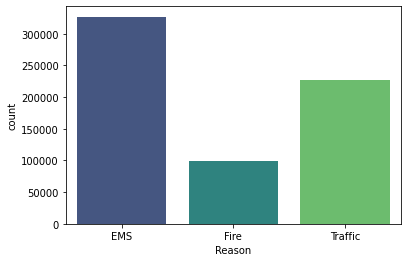

In [34]:
sns.countplot(x='Reason',data=df,palette='viridis')

## What is the datatype of the objects in the timeStamp column ?

In [37]:
type(df['timeStamp'].iloc[0])

str

## Change these timeStamp to DateTime objects

In [40]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [41]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
# Now we can grab data directly by

time = df['timeStamp'].iloc[0]
time.hour

17

In [43]:
time

Timestamp('2015-12-10 17:10:52')

In [44]:
time.year

2015

In [46]:
time.dayofweek

3

In [48]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
652687    11
652688    11
652689    11
652690    11
652691    11
Name: Hour, Length: 652692, dtype: int64

In [49]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [50]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


## Use .map() method to map day of week from int to str

    dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat',6:'Sun' }